In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

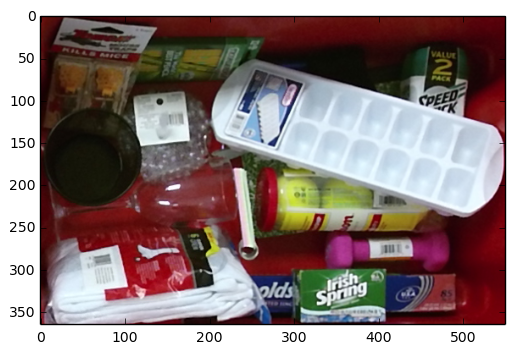

In [2]:
#tote_stamp = '170331141533'
tote_stamp = '170404121559'
#tote_stamp = '170404122759'
filename = 'tote/' + tote_stamp + '.png'
image_BGR = cv2.imread(filename)
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB);

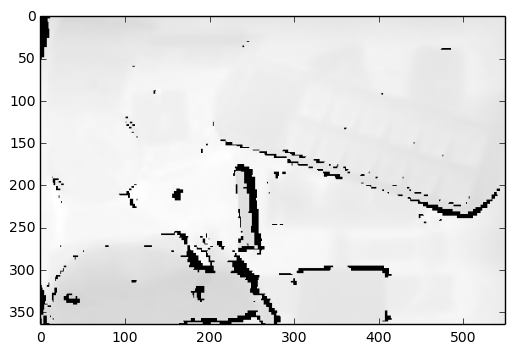

In [3]:
filename = 'tote/' + tote_stamp + '.pgm'
image = cv2.imread(filename,1)
plt.imshow(image);

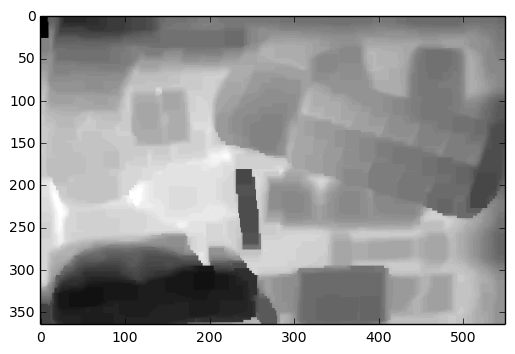

In [4]:
kernel = np.ones((3,3),'uint8')
iterations = 0
d = image[:,:,0]
while sum(sum(d==0)) > 0:
    d = cv2.dilate(d,kernel,borderType=cv2.BORDER_REPLICATE)
    iterations += 1
d = cv2.erode(d,kernel,iterations=iterations)
plt.imshow(d,cmap='gray');

In [5]:
min_depth = int(np.min(d))
thresh_depth = min_depth + 1
stop = False
while not stop:
    top_obj = cv2.inRange(d,min_depth,thresh_depth)
    (cnt,_) = cv2.findContours(top_obj,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(cnt)>0:
        max_cnt = max(cnt, key = cv2.contourArea)
        stop = len(cnt) > 2 and cv2.contourArea(max_cnt) > 10000
    thresh_depth += 1

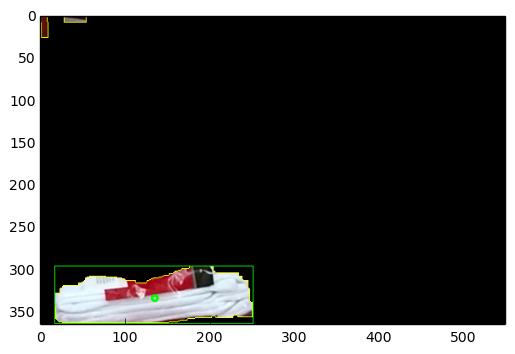

In [6]:
image_top = cv2.bitwise_and(image_RGB,image_RGB,mask=top_obj)
cv2.drawContours(image_top,cnt,-1,(255,255,0))
M = cv2.moments(max_cnt)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
cv2.circle(image_top, (cX, cY), 3, (0, 255, 0), 2)
x,y,w,h = cv2.boundingRect(max_cnt)
cv2.rectangle(image_top,(x,y),(x+w,y+h),(0,255,0),1)
plt.imshow(image_top);

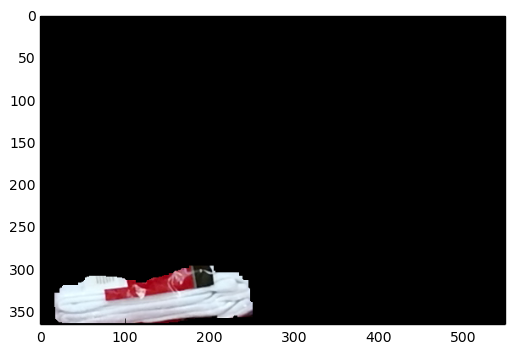

In [7]:
obj_mask = np.zeros(image_RGB.shape[0:2], np.uint8)
cv2.drawContours(obj_mask, [max_cnt], -1, (255), thickness=-1)
image_obj = cv2.bitwise_and(image_RGB,image_RGB,mask=obj_mask)
plt.imshow(image_obj);

In [8]:
image_obj = cv2.cvtColor(image_obj,cv2.COLOR_RGB2BGR)
filename = 'tote/' + tote_stamp + '_obj.png'
cv2.imwrite(filename,image_obj)

True